In [85]:
# CHAPTER 4 FINITE VOLUME METHOD FOR DIFFUSION PROBLEMS

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
Ly        = 0.4 # Length of the plate
Lx        = 0.3

num_nodes_y = 4
num_nodes_x = 3

del_x     = round(Lx / num_nodes_x, 2)
del_y     = round(Ly / num_nodes_y, 2)

thickness = 0.01

k         = 1000

A         = 0.001

q_W       = 500_000  # uniform heat generation

T_A       = 100 # North Side
                # East  -> Insulated dT/dx = 0
                # South -> Insulated dT/dy = 0

In [88]:
nodes = []
n = 1
for i in range(num_nodes_x):
    l = []
    for j in range(num_nodes_y):
        l.append(n)
        n+=1
    nodes.append(l)

# nodes = nodes[::-1]
nodes = np.fliplr(np.array(nodes)).transpose()

for i in nodes:
    print(i)

[ 4  8 12]
[ 3  7 11]
[ 2  6 10]
[1 5 9]


In [89]:
nodes[0][2]

12

In [90]:
node_info = {i: ["ap"] for i in range(num_nodes_y * num_nodes_x)}
node_info

{0: ['ap'],
 1: ['ap'],
 2: ['ap'],
 3: ['ap'],
 4: ['ap'],
 5: ['ap'],
 6: ['ap'],
 7: ['ap'],
 8: ['ap'],
 9: ['ap'],
 10: ['ap'],
 11: ['ap']}

In [91]:
def find_neighbors(row, col):
    """!!!!!!!!!!!! Remeber that it returns node number not index !!!!!!!!!!!!"""
    north = nodes[row-1][col] if row > 0 else None
    south = nodes[row+1][col] if row < num_nodes_y - 1 else None
    west = nodes[row][col-1] if col > 0 else None
    east = nodes[row][col+1] if col < num_nodes_x - 1 else None
    return {'north': north, 'east': east, 'south': south, 'west': west}

find_neighbors(1,1)

{'north': 8, 'east': 11, 'south': 6, 'west': 3}

In [92]:
nodes[0][1]

8

In [93]:
node_lengths_x = [round(del_x,3)] * num_nodes_x
node_lengths_x

[0.1, 0.1, 0.1]

In [94]:
node_lengths_y = [round(del_x,3)] * num_nodes_y
node_lengths_y

[0.1, 0.1, 0.1, 0.1]

In [95]:
node_lengths_x = []

In [96]:
half_length_x = [i/2 for i in node_lengths_x]
half_length_x

[]

In [97]:
half_length_y = [i/2 for i in node_lengths_y]
half_length_y

[0.05, 0.05, 0.05, 0.05]

In [98]:
PE_WP = []
for i in range(len(half_length_x)):
    if i == 0:
        PE_WP.append([half_length_x[i], half_length_x[i] + half_length_x[i+1]])
    elif i == len(half_length_x)-1:
        PE_WP.append([half_length_x[i] + half_length_x[i-1], half_length_x[i]])
    else:
        PE_WP.append([half_length_x[i] + half_length_x[i-1], half_length_x[i] + half_length_x[i+1]])
PE_WP

[]

In [99]:
PS_NP = []
for i in range(len(half_length_y)):
    if i == 0:
        PS_NP.append([half_length_y[i], half_length_y[i] + half_length_y[i+1]])
    elif i == len(half_length_y)-1:
        PS_NP.append([half_length_y[i] + half_length_y[i-1], half_length_y[i]])
    else:
        PS_NP.append([half_length_y[i] + half_length_y[i-1], half_length_y[i] + half_length_y[i+1]])
PS_NP

[[0.05, 0.1], [0.1, 0.1], [0.1, 0.1], [0.1, 0.05]]

In [100]:
# del_x = [0.05, 0.1, 0.1]
# del_y = [0.1, 0.1, 0.05]

In [101]:
coef_matrix = np.zeros((num_nodes_y*num_nodes_x, num_nodes_y*num_nodes_x))
coef_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [102]:
Su_vector = np.zeros_like(coef_matrix[:,0])
Su_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
for i in nodes:
    print(i)

[ 4  8 12]
[ 3  7 11]
[ 2  6 10]
[1 5 9]


In [104]:
del_xs = [0.05, 0.1, 0.1, 0.1]
del_ys = [0.1, 0.1, 0.1, 0.05]

In [105]:
# 0 -> 3,0
# 1 -> 2,0
# 2 -> 1,0
# 3 -> 0,0
# 4 -> 3,1

In [106]:
def linear_to_flipped_coords(index, num_rows):
    col = index // num_rows
    row_from_bottom = index % num_rows
    row = num_rows - 1 - row_from_bottom
    return (row, col)

linear_to_flipped_coords(5, 4)

(2, 1)

In [107]:
num_nodes_x

3

In [108]:
nodes = np.array(nodes)

for node_idx in range(num_nodes_x * num_nodes_y):
    node_num =  node_idx   # Only used to save in coeff matrix
    cell_x, cell_y = linear_to_flipped_coords(node_idx, 4)

    a_N = 0
    a_S = 0
    a_E = 0
    a_W = 0

    nei_dict = find_neighbors(cell_x, cell_y)
    Area_y = thickness * del_y
    Area_x = thickness * del_x

    if nei_dict['west'] is None and nei_dict['south'] is None:  # bottom-left corner
        a_E = (k * Area_x) / del_x
        a_N = (k * Area_y) / del_y
        a_S = 0
        a_W = 0
        
        a_P = a_E + a_N + a_S + a_W
        Su = q_W * thickness * del_x
        
        coef_matrix[node_num, node_num] = a_P
        coef_matrix[node_num, nei_dict['north'] - 1] = a_N
        coef_matrix[node_num, nei_dict['east'] - 1] = a_E
        Su_vector[node_num] = Su

    elif nei_dict['west'] is None and nei_dict['south'] is not None and nei_dict['north'] is not None:  # left edge except bottom and top edge
        a_E = (k * Area_x) / del_x
        a_S = (k * Area_y) / del_y
        a_N = (k * Area_y) / del_y
        a_W = 0
        
        a_P = a_E + a_N + a_S + a_W
        Su = q_W * thickness * del_x
        
        coef_matrix[node_num, node_num] = a_P
        coef_matrix[node_num, nei_dict['north'] - 1] = a_N
        coef_matrix[node_num, nei_dict['east'] - 1] = a_E
        coef_matrix[node_num, nei_dict['south'] - 1] = a_S
        Su_vector[node_num] = Su
        
    elif nei_dict['west'] is None and nei_dict['north'] is None:  # top-left corner (with Dirichlet top boundary)
        a_N = (k * Area_y) / (del_y / 2)  # half cell size for Dirichlet face
        a_E = (k * Area_x) / del_x
        a_S = (k * Area_y) / del_y
        a_W = 0
        
        a_P = a_E + a_N + a_S + a_W
        Su = (q_W * thickness * del_x) + a_N * T_A  # include Dirichlet contribution
        
        coef_matrix[node_num, node_num] = a_P
        coef_matrix[node_num, nei_dict['east'] - 1] = a_E
        coef_matrix[node_num, nei_dict['south'] - 1] = a_S
        Su_vector[node_num] = Su

    elif nei_dict['north'] is None and nei_dict['west'] is not None:  # top edge except top-left
        a_N = (k * Area_y) / (del_y / 2)  # Dirichlet boundary
        a_E = (k * Area_x) / del_x if nei_dict['east'] is not None else 0
        a_S = (k * Area_y) / del_y if nei_dict['south'] is not None else 0
        a_W = (k * Area_x) / del_x if nei_dict['west'] is not None else 0
        
        a_P = a_E + a_N + a_S + a_W
        Su = a_N * T_A  # Only Dirichlet contribution, no west flux
        
        coef_matrix[node_num, node_num] = a_P
        if nei_dict['east'] is not None:
            coef_matrix[node_num, nei_dict['east'] - 1] = a_E
        if nei_dict['south'] is not None:
            coef_matrix[node_num, nei_dict['south'] - 1] = a_S
        if nei_dict['west'] is not None:
            coef_matrix[node_num, nei_dict['west'] - 1] = a_W
        Su_vector[node_num] = Su


    else:  # Interior or other edges not handled above
        # Assign available neighbor coefficients safely
        if nei_dict['north'] is not None:
            a_N = (k * Area_y) / del_y
            coef_matrix[node_num, nei_dict['north'] - 1] = a_N
        else:
            a_N = 0

        if nei_dict['south'] is not None:
            a_S = (k * Area_y) / del_y
            coef_matrix[node_num, nei_dict['south'] - 1] = a_S
        else:
            a_S = 0

        if nei_dict['east'] is not None:
            a_E = (k * Area_x) / del_x
            coef_matrix[node_num, nei_dict['east'] - 1] = a_E
        else:
            a_E = 0

        if nei_dict['west'] is not None:
            a_W = (k * Area_x) / del_x
            coef_matrix[node_num, nei_dict['west'] - 1] = a_W
        else:
            a_W = 0
        
        a_P = a_E + a_N + a_S + a_W
        coef_matrix[node_num, node_num] = a_P
        
        # Source term 0 for interior nodes, add if needed here
        Su_vector[node_num] = 0

In [109]:
nei_dict

{'north': None, 'east': None, 'south': 11, 'west': 8}

In [110]:
Su_vector

array([ 500.,  500.,  500., 2500.,    0.,    0.,    0., 2000.,    0.,
          0.,    0., 2000.])

In [111]:
# Making non diagnol element negetive
mask = ~np.eye(coef_matrix.shape[0], dtype=bool)
coef_matrix[mask] = -coef_matrix[mask]

coef_matrix

array([[ 20., -10.,  -0.,  -0., -10.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
         -0.],
       [-10.,  30., -10.,  -0.,  -0., -10.,  -0.,  -0.,  -0.,  -0.,  -0.,
         -0.],
       [ -0., -10.,  30., -10.,  -0.,  -0., -10.,  -0.,  -0.,  -0.,  -0.,
         -0.],
       [ -0.,  -0., -10.,  40.,  -0.,  -0.,  -0., -10.,  -0.,  -0.,  -0.,
         -0.],
       [-10.,  -0.,  -0.,  -0.,  30., -10.,  -0.,  -0., -10.,  -0.,  -0.,
         -0.],
       [ -0., -10.,  -0.,  -0., -10.,  40., -10.,  -0.,  -0., -10.,  -0.,
         -0.],
       [ -0.,  -0., -10.,  -0.,  -0., -10.,  40., -10.,  -0.,  -0., -10.,
         -0.],
       [ -0.,  -0.,  -0., -10.,  -0.,  -0., -10.,  50.,  -0.,  -0.,  -0.,
        -10.],
       [ -0.,  -0.,  -0.,  -0., -10.,  -0.,  -0.,  -0.,  20., -10.,  -0.,
         -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0., -10.,  -0.,  -0., -10.,  30., -10.,
         -0.],
       [ -0.,  -0.,  -0.,  -0.,  -0.,  -0., -10.,  -0.,  -0., -10.,  30.,
        -10.],
       [ -0.,  -0.,  

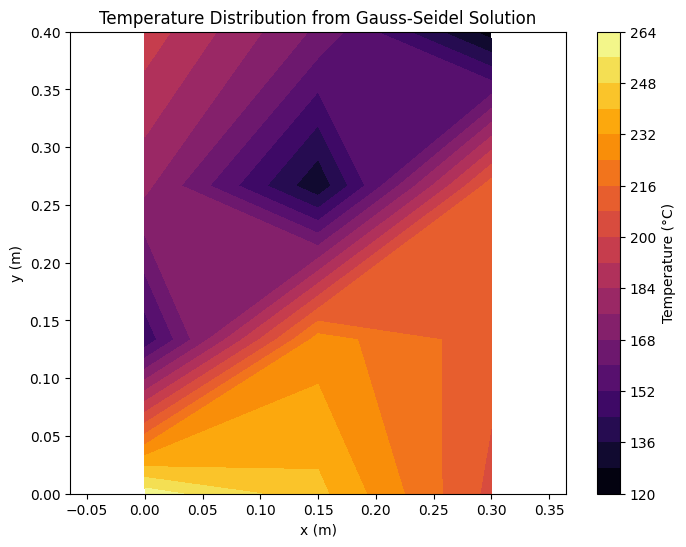

In [112]:
def Gauss_Sadel(A, B, X, tolerance=1e-8, max_loops=1000):
    relative_error = np.inf
    loops_taken = 0

    while relative_error > tolerance:
        X_old = X.copy()
        for j in range(len(A)):
            sigma = 0.0
            for i in range(len(A)):
                if i != j:
                    sigma += A[j, i] * X[i]
            X[j] = (B[j] - sigma) / A[j, j]

        loops_taken += 1
        if max_loops and loops_taken >= max_loops:
            break

        relative_error = np.linalg.norm(X - X_old, np.inf) / (np.linalg.norm(X, np.inf) + 1e-12)

    return X, loops_taken

X, loops_taken = Gauss_Sadel(coef_matrix, Su_vector, np.zeros_like(Su_vector),
                             tolerance=1e-12, max_loops=100)

# X = np.fliplr(X.reshape(4,3)).transpose()
X = X.reshape(4,3)
# Use actual domain dimensions
dx = del_x  # Use your calculated grid spacing (0.1m)
dy = del_y  # Use your calculated grid spacing (0.1m)

nx = X.shape[1]  # Should be 3
ny = X.shape[0]  # Should be 4

# Create coordinate arrays based on actual domain
x = np.linspace(0, Lx, nx)  # 0 to 0.3m
y = np.linspace(0, Ly, ny)  # 0 to 0.4m
X_grid, Y_grid = np.meshgrid(x, y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X_grid, Y_grid, X, levels=20, cmap='inferno')
plt.colorbar(contour, label='Temperature (°C)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Temperature Distribution from Gauss-Seidel Solution')
plt.axis('equal')  # Keep aspect ratio correct
plt.show()